# **Disease Symptoms Prediction**
Disease prediction with machine learning


## **Introduction:**
Disease symptoms prediction is a groundbreaking application of artificial intelligence (AI) and machine learning (ML) that focuses on analyzing user-reported symptoms to predict possible medical conditions. This innovative approach aims to bridge the gap between individuals and healthcare services by offering early insights into potential health issues, enabling users to seek timely medical attention.

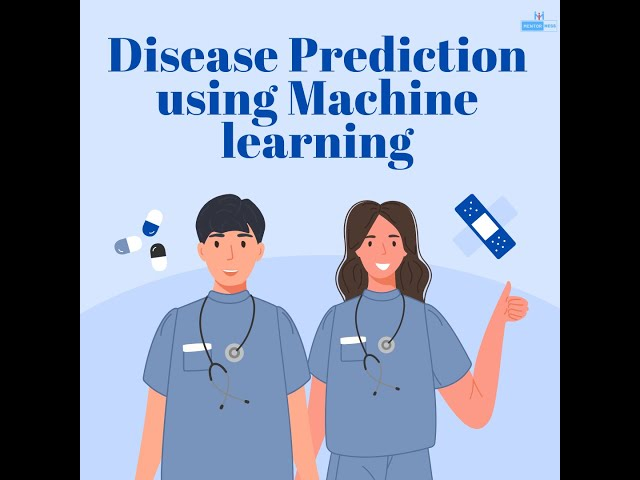

## **Purpose**
**Early Diagnosis:** Identifying potential diseases early can significantly improve treatment outcomes and reduce healthcare costs.

**Accessibility:** Provides preliminary guidance to users who may not have immediate access to healthcare professionals.

**Efficiency:** Reduces the burden on healthcare systems by streamlining initial diagnostic steps.

**Personalized Insights:** Tailors predictions based on user-reported symptoms, considering their unique combinations and patterns.


## **What is a Prediction System?**

A prediction system is a computational tool or software application that uses data and statistical or machine learning (ML) techniques to make informed predictions about future outcomes or unknown events. It analyzes patterns in existing data to estimate the likelihood of specific results, enabling decision-making and problem-solving across various domains.


## **Initial Requirments:**

1.   numpy
2.   pandas
3.   sklearn
4.   matplotlib
5.   seabon

Dataset:[dataset of disease prediction
](https://www.kaggle.com/datasets/itachi9604/disease-symptom-description-dataset)
   

## **Break Down The Process**


*   import Libraries
*   Load the dataset
*   Analyze dataset along data cleaning
*   List item






### **Initial Libraries**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
from sklearn.utils import shuffle

# read the dataset
df=pd.read_csv('dataset.csv')
df = shuffle(df,random_state=42)
df.head()

# row and col
df.shape

In [ ]:
#columns names
df.columns

In this dataset we can see some symptom are writing by using "-" ,
need to remove those symptoms and white spaces

### **Data Cleaning and Handle missing values**

In [ ]:
for col in df.columns:

    df[col] = df[col].str.replace('_',' ')
df.head()

In [ ]:
# statistical observation
df.describe()

In [ ]:
# check the null values and store null_check variable
null_check=df.isnull().sum()
print(null_check)

There are so many missing values are present in symptom_4 to symptom_17

In [ ]:
# count all the null values
null_check = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_check)

### **Visual Observation of null values before removing Null values**

In [ ]:
# plotting the null values
plt.figure(figsize=(10,5))
plt.plot(null_check.index, null_check['count'],color='r')
plt.xticks(rotation=90)
plt.title('Before removing Null values',fontweight='bold')
plt.xlabel('Symptoms', fontweight='bold')
plt.ylabel('count of null values',fontweight='bold')
# Add count values as annotations
for i, value in enumerate(null_check['count']):
    plt.annotate(
        str(value),
        xy=(null_check.index[i], value),
        xytext=(0, 5),
        textcoords='offset points',
        color='black',
        fontsize=10,
        ha='center',
    )
plt.show()

In [ ]:
# store columns name in col
cols=df.columns
cols

In [ ]:
df

In [ ]:
# Flatten the DataFrame into a 1D array
data = df[cols].values.flatten()
print(data)

Flattening a DataFrame into a 1D array simplifies data manipulation and analysis tasks, making it easier to perform operations, work with certain functions, and visualize data effectively.

In [ ]:
# Convert to a Pandas Series and strip whitespace
s = pd.Series(data)
# Remove leading and trailing whitespace
s = s.str.strip()


The code converts the flattened DataFrame values into a Pandas Series and then removes leading and trailing whitespace from the elements in the Series.

In [ ]:
#reshape the values in series
s = s.values.reshape(df.shape)

In [ ]:
df = pd.DataFrame(s, columns=df.columns)
df.head()

In [ ]:
# fill the missing values with 0
df = df.fillna(0)
df.head()

we can see previous where present NAN values all are convert in to 0

### **Analysis of Symptoms serverity Dataset**

In [ ]:
#Symptom-severity csv
df1 = pd.read_csv('Symptom-severity.csv')
df1['Symptom'] = df1['Symptom'].str.replace('_',' ')
df1.head()

In [ ]:
# unique valu of dataset csv
df1['Symptom'].unique()

In [ ]:
# count the value of symptoms
df1['Symptom'].value_counts()

In [ ]:
# obseve the unique values of Disease
df['Disease'].unique()

### Need to replace values in a DataFrame (df)based on a mapping from another DataFrame(df1)

In [ ]:
# Extract the values of the DataFrame df as a Numpy array
values = df.values
print(values)

In [ ]:
# Extract the values of the DataFrame df as a Numpy array
values = df.values
#retrives unique values from the symptom of df1
symptoms = df1['Symptom'].unique()
#replace values in the array based on mapping from df1
for i in range(len(symptoms)):

  values[values == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]


In [ ]:
print(values)

In [ ]:
# create a new DataFrame with modified values
newdata= pd.DataFrame(values, columns=cols)
newdata.head()

### **Check the missing values**

In [ ]:
# Replace specific values with 0
newdata =newdata.replace('dischromic patches', 0)
newdata= newdata.replace('spotting urination', 0)
df = newdata.replace('foul smell of urine', 0)

df.head()

In [ ]:
# again check null
null_check = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_check)

now here is no null values are present


In [ ]:
print("Symptoms used to identify the disease ",len(df1['Symptom'].unique()))
print("Diseases that can be identified ",len(df['Disease'].unique()))

### **Model Preparation**

---



### **Take the Data and labels from the dataset**

In [ ]:
#data = df.iloc[:,1:].values
data=df[['Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5','Symptom_6']].values
labels = df['Disease'].values

In [ ]:
print(data.shape)

**Spliting the dataset in to traing and tesing dataset**

Taking 70% of traing data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, shuffle=True, train_size = 0.70, random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
df['Disease'].unique()

### **Analysis train and test Data**

In [ ]:
print(x_train[:10])

In [ ]:
print(x_test[:10])

### **Explore x_train data**

In [ ]:
# Convert x_train to DataFrame for easier manipulation
x_train_df = pd.DataFrame(x_train)

# Inspect the DataFrame to find non-numeric values
print(x_train_df.head())
print(x_train_df.dtypes)

Here we can see there is present some object values so we can not fit it in model, we  have to convert those non numeric values to numeric values.

In [ ]:
# Find unique values to check for non-numeric entries
unique_values = pd.unique(x_train_df.values.ravel())
print(unique_values)

In [ ]:
# Replace specific non-numeric values with a numeric value (e.g., 0)
x_train_df.replace(['dischromic  patches', 'spotting  urination'], 0, inplace=True)

# Convert the DataFrame to numeric, coercing errors to NaN (if needed)
x_train_df = x_train_df.apply(pd.to_numeric, errors='coerce')

# Fill NaN values with a specific number (e.g., 0)
x_train_df.fillna(0, inplace=True)

# Convert back to NumPy array
x_train = x_train_df.values


In [ ]:
print(x_train.dtype)

In [ ]:
print(x_train[:10])

In [ ]:
# Find unique values to check for non-numeric entries
unique_values = pd.unique(x_train_df.values.ravel())
print(unique_values)

### **Explore x_test data**

In [ ]:
# Check data types of x_test
print(x_test.dtype)

In [ ]:
# Convert x_train to DataFrame for easier manipulation
x_test_df = pd.DataFrame(x_test)

# Inspect the DataFrame to find non-numeric values
print(x_test_df.head())
print(x_test_df.dtypes)


Here also we can see there is present some object values so we can not fit it in model, we have to convert those non numeric values to numeric values.

In [ ]:
# Find unique values to check for non-numeric entries
unique_values = pd.unique(x_test_df.values.ravel())
print(unique_values)

In [ ]:
# Replace specific non-numeric values with a numeric value (e.g., 0)
x_test_df.replace(['dischromic  patches', 'spotting  urination'], 0, inplace=True)

# Convert the DataFrame to numeric, coercing errors to NaN (if needed)
x_test_df = x_test_df.apply(pd.to_numeric, errors='coerce')

# Fill NaN values with a specific number (e.g., 0)
x_test_df.fillna(0, inplace=True)

# Convert back to NumPy array
x_test = x_test_df.values

In [ ]:
# Check data types of x_test
print(x_test.dtype)

In [ ]:
len(set(y_test))

In [ ]:
print(x_test[:10])

# **Create model:**

---
## KNeighborsClassifier


In [ ]:
# import libraries for KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(15)

In [ ]:
# fit data in to model
knn.fit(x_train,y_train)

In [ ]:
# predict based on x_test
y_predd=knn.predict(x_test)
y_predd

In [ ]:
# Accuracy of KNeighborsClassifier
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predd)
print(f"Accuracy of KNeighborsClassifier: {accuracy:.2f}")

In [ ]:
import pickle
filename = 'knn.sav'
pickle.dump(knn, open(filename, 'wb'))

In [ ]:
import joblib
joblib.dump(knn,'knn.pkl')

**Test Case 1:**

In [ ]:
#  Take the weight of some symptoms
x=[5,4,5,5,5,4]
y=np.array(x).reshape(1,-1)
predict= knn.predict(y)
print("Predicted Disease is: ",predict)

**Test Case2:**


In [ ]:
x=[3,5,7,6,0,0]
y=np.array(x).reshape(1,-1)
predict=knn.predict(y)
print("Predicted Disease is: ",predict)



---


## RandomForestClassifier

In [ ]:
# import libraries of RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rnd_forest = RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 500, max_depth=13)
rnd_forest.fit(x_train,y_train)

In [ ]:
# predict based on test vales
y_pred=rnd_forest.predict(x_test)
print(y_pred)

**Visual Observation Of Confusion Matrix of RandomForestClassifier**

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import pandas as pd
import seaborn as sns
conf = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(conf, index=df['Disease'].unique(), columns=df['Disease'].unique())
print(f"F1-score: {f1_score(y_test, y_pred, average='macro') * 100:.2f}% | Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
sns.heatmap(df_cm)

In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

**Test case1:**

In [ ]:
x=[1,3,4,6,0,0]
y=np.array(x).reshape(1,-1)
predict= rnd_forest.predict(y)
print("Predicted Disease is: ",predict)

**Test Case 2:**

In [ ]:
x=[5,3,4,6,0,0]
y=np.array(x).reshape(1,-1)
prediction=rnd_forest.predict(y)
prediction



---


## DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(x_train,y_train)

In [ ]:
# prediction  based on test data
y_pred1=dtree.predict(x_test)
print(y_pred1)

In [ ]:
# Accurecy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred1)
print(f"Accuracy of DecisionTreeClassifier: {accuracy:.2f}")

**Test Case 1:**

In [ ]:
x=[1,3,4,6,0,0]
y=np.array(x).reshape(1,-1)
predict= dtree.predict(y)
print("Predicted Disease is: ",predict)

Test Case 2:

In [ ]:
x=[5,3,4,6,0,0]
y=np.array(x).reshape(1,-1)
prediction=dtree.predict(y)
prediction



---

## Support Vector Classifier

In [ ]:
# import libraries of Support Vector Classifier
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=42)
svm.fit(x_train, y_train)

In [ ]:
# prediction based on test data
y_pred2=svm.predict(x_test)
print(y_pred2)
# Accurecy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred2)
print(f"Accuracy of SVC: {accuracy:.2f}")

Test Case1:

In [ ]:
x=[5,3,4,6,0,0]
y=np.array(x).reshape(1,-1)
prediction=svm.predict(y)
prediction

**Test Case 2:**

In [ ]:
x=[3,7,4,4,3,0]
y=np.array(x).reshape(1,-1)
prediction=svm.predict(y)
prediction



---


*symptom Description and Precaution*

In [ ]:
# read descriptions
description=pd.read_csv("symptom_Description.csv")
description.head(10)

In [ ]:
#check the null values
description.isnull().sum()

In [ ]:
ds = description.drop('Disease', axis=1)
ds.index = description['Disease']
ds.head()

In [ ]:
precaution = pd.read_csv("symptom_precaution.csv")
precaution.head(10)

In [ ]:
# check the null values
precaution.isnull().sum()

In [ ]:
# fill na
precaution = precaution.fillna(" ")
precaution.head()

In [ ]:
precaution['precautions']=""
precaution['punc']=', '
for i in range(1,5):
    precaution['s']=precaution["Precaution_{}".format(i)]+precaution['punc']
    precaution['precautions']=precaution['precautions']+precaution['s']
precaution.head(10)

In [ ]:
# save
import joblib
joblib.dump(rnd_forest,'disease.pkl')


In [ ]:
for i in range(1,5):
    pr=precaution.drop("Precaution_{}".format(i),axis=1)
pr.head(10)

In [ ]:
pr=pr.drop(['s','punc'],axis=1)
pr.head(10)

In [ ]:
pr.index=pr['Disease']
pr=pr.drop('Disease',axis=1)
pr.head()



---
## Ensemble


In [ ]:

from sklearn.ensemble import VotingClassifier
knn=KNeighborsClassifier(15)
rnd_forest = RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 500, max_depth=13)
dtree = DecisionTreeClassifier(random_state=42)
svm = SVC(kernel='rbf', random_state=42)
voting_classifier = VotingClassifier(estimators=[('knn', knn), ('rf', rnd_forest), ('dt', dtree), ('svm', svm)], voting='hard')
voting_classifier.fit(x_train, y_train)
yprediction=voting_classifier.predict(x_test)
print(yprediction)
# Accurecy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, yprediction)
print(f"Accuracy of VotingClassifier: {accuracy:.2f}")

In [ ]:
# Test : disease and with respect to its precution
x=[5,3,4,6,0,0]
y=np.array(x).reshape(1,-1)
prediction=voting_classifier.predict(y)
print("Predicted Disease is: ",prediction)


In [ ]:
# save pikle
#import joblib
#joblib.dump(rnd_forest,'disease.pkl')

In [ ]:
# save with pickle
import pickle
filename = 'new.sav'
pickle.dump(voting_classifier, open(filename, 'wb'))

In [ ]:
#save model
import joblib
joblib.dump(voting_classifier,'disease1.pkl')

In [ ]:
# load
model = joblib.load('disease1.pkl')

In [ ]:
# Test
x=[5,3,4,6,0,0]
y=np.array(x).reshape(1,-1)
prediction=model.predict(y)
print("Predicted Disease is: ",prediction)

In [ ]:
example_input = [[1,4,3,4,0,0]]
prediction = model.predict(example_input)
print("Prediction:", prediction)

In [ ]:
# @title
import matplotlib.pyplot as plt

disease = 'Flu'
precautions = ['Drink plenty of fluids', 'Rest', 'Take fever medication', 'Avoid contact with others']

plt.figure(figsize=(8, 6))
plt.barh(precautions, range(len(precautions)), color='green')
plt.xlabel('Precautions')
plt.title(f'Recommended Precautions for {disease}')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
precautions = precaution['precautions']
precautions_text = ' '.join(precautions)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(precautions_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Recommended Precautions for {disease}')
plt.show()